In [5]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numdifftools as nd
import pandas as pd
import respy as rp
import numpy as np

from calibration_maximum_likelihood import run_bootstrap

params_base, options_base, df = rp.get_example_model("robinson", with_data=True)

params_base["lower"] = [0.9, 0.00, -0.20, 1.00, 0.0050, 0.001, -0.4]
params_base["upper"] = [1.0, 0.10,  0.00, 1.10, 0.0150, 0.030, +0.4]

# We will use estimagic and fix all parameters at their true values.
constr_base = [
    {"loc": ("shocks_sdcorr", "sd_fishing"), "type": "fixed"}, 
    {"loc": ("shocks_sdcorr", "sd_hammock"), "type": "fixed"}, 
    {"loc": ("shocks_sdcorr", "corr_hammock_fishing"), "type": "fixed"}, 
    {"loc": "wage_fishing", "type": "fixed"},
    {"loc": "nonpec_fishing", "type": "fixed"},
    {"loc": "nonpec_hammock", "type": "fixed"}
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


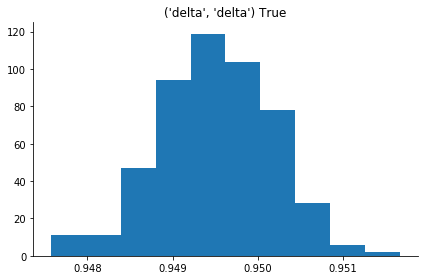

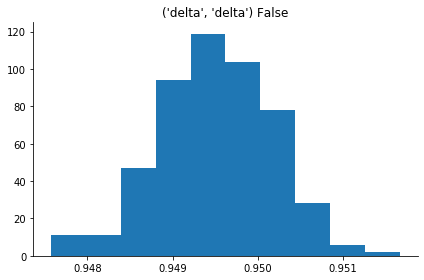

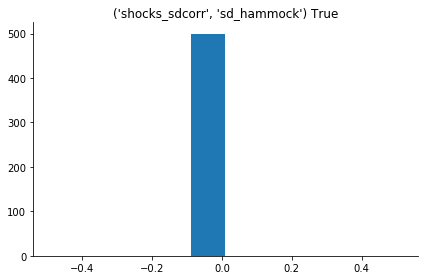

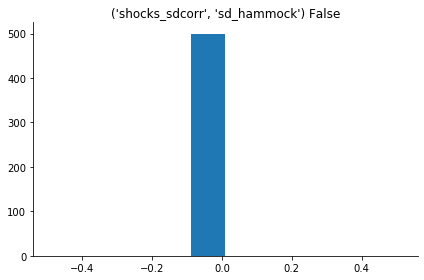

In [6]:
num_boots = 1
    
for i, index in enumerate([("delta", "delta"), ("shocks_sdcorr", "sd_hammock")]):
    
    constr = constr_base.copy()

    # We fix the discount factor and free "corr_hammock_fishing"
    if i == 1:
        constr.pop(2)
        constr.append({'loc': "delta", "type": "fixed"})
    
    for is_perturb in [True, False]:

        if False:
            boot_params = run_bootstrap(df, params_base, options_base, constr, num_boots, is_perturb)
        else:
            fname = f"bootstrap.{index[1]}_perturb_{str(is_perturb).lower()}.pkl"
            boot_params = pd.read_pickle(fname)

        fig, ax = plt.subplots()

        ax.hist(boot_params.loc[index, :])
        ax.set_title(f"{index} {is_perturb}")

        plt.show()
        


In [7]:
boot_params

bootstrap_0  bootstrap_1  bootstrap_2  \
category       name                                                          
delta          delta                       0.950     0.950000     0.950000   
wage_fishing   exp_fishing                 0.070     0.070000     0.070000   
nonpec_fishing constant                   -0.100    -0.100177    -0.100064   
nonpec_hammock constant                    1.046     1.046000     1.046000   
shocks_sdcorr  sd_fishing                  0.010     0.010000     0.010000   
               sd_hammock                  0.010     0.010000     0.010000   
               corr_hammock_fishing        0.000     0.000000     0.000000   

                                     bootstrap_3  bootstrap_4  bootstrap_5  \
category       name                                                          
delta          delta                    0.950000     0.950000     0.950000   
wage_fishing   exp_fishing              0.070000     0.070000     0.070000   
nonpec_fishing constant                -0.099951    -0.100103    -0.100056   
nonpec_hammock constant                 1.046000     1.046000     1.046000   
shocks_sdcorr  sd_fishing               0.010000     0.010000     0.010000   
               sd_hammock               0.010000     0.010000     0.010000   
               corr_hammock_fishing     0.000000     0.000000     0.000000   

                                     bootstrap_6  bootstrap_7  bootstrap_8  \
category       name                                                          
delta          delta                    0.950000     0.950000     0.950000   
wage_fishing   exp_fishing              0.070000     0.070000     0.070000   
nonpec_fishing constant                -0.100112    -0.100212    -0.100103   
nonpec_hammock constant                 1.046000     1.046000     1.046000   
shocks_sdcorr  sd_fishing               0.010000     0.010000     0.010000   
               sd_hammock               0.010000     0.010000     0.010000   
               corr_hammock_fishing     0.000000     0.000000     0.000000   

                                     bootstrap_9  ...  bootstrap_490  \
category       name                               ...                  
delta          delta                    0.950000  ...       0.950000   
wage_fishing   exp_fishing              0.070000  ...       0.070000   
nonpec_fishing constant                -0.100044  ...      -0.100217   
nonpec_hammock constant                 1.046000  ...       1.046000   
shocks_sdcorr  sd_fishing               0.010000  ...       0.010000   
               sd_hammock               0.010000  ...       0.010000   
               corr_hammock_fishing     0.000000  ...       0.000000   

                                     bootstrap_491  bootstrap_492  \
category       name                                                 
delta          delta                      0.950000       0.950000   
wage_fishing   exp_fishing                0.070000       0.070000   
nonpec_fishing constant                  -0.099973      -0.100218   
nonpec_hammock constant                   1.046000       1.046000   
shocks_sdcorr  sd_fishing                 0.010000       0.010000   
               sd_hammock                 0.010000       0.010000   
               corr_hammock_fishing       0.000000       0.000000   

                                     bootstrap_493  bootstrap_494  \
category       name                                                 
delta          delta                      0.950000       0.950000   
wage_fishing   exp_fishing                0.070000       0.070000   
nonpec_fishing constant                  -0.100213      -0.099997   
nonpec_hammock constant                   1.046000       1.046000   
shocks_sdcorr  sd_fishing                 0.010000       0.010000   
               sd_hammock                 0.010000       0.010000   
               corr_hammock_fishing       0.000000       0.000000   

                                   